## pangeblocks

In [363]:
import sys
from pathlib import Path

# add parent folder to the path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.time_verbose_extractor import time_from_log

## Pangeblocks
___

In [364]:
REF_EXPERIMENT="didelot"
TOOL="pangeblocks"

PATH_LOGS=Path(f"/data/pangeblocks-experiments/{REF_EXPERIMENT}-{TOOL}")
logs = list(PATH_LOGS.rglob("*err.log"))
len(logs)

144

In [365]:
for log in logs: print(log)

/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op5-ep0/logs/slpa-simu.fasta-rule-decompose_blocks.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op5-ep0/logs/slpa-real.fasta-rule-decompose_blocks.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op5-ep0/logs/coli27-86.fasta-rule-decompose_blocks.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op5-ep0/logs/slpa-basis.fasta-rule-decompose_blocks.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op5-ep0/logs/weighted/penalization7-min_len5/coli27-86.fasta-rule-pangeblock.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op5-ep0/logs/weighted/penalization7-min_len5/slpa-real.fasta-rule-pangeblock.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op5-ep0/logs/weighted/penalization7-min_len5/slpa-simu.fasta-rule-pangeblock.err.log
/data/pange

In [369]:
data_from_logs = []

for log in logs:
    
    name_input, rule = log.stem.replace(".err","").split("-rule-")
    # name_input, rule = info.split("-rule-")

    metadata_rule=dict()
    if rule in ["pangeblock", "postprocessing_gfa", "unchop_gfa"]:

        # penalization and min_len
        penalization, min_len = log.parent.stem.split("-")
        penalization = int(penalization.replace("penalization",""))
        min_len = int(min_len.replace("min_len",""))

        # objective function
        obj_function = log.parent.parent.stem

        metadata_rule = {
            "obj_function": obj_function,
            "penalization": penalization,
            "min_len": min_len,
            }

    # msa 
    folder_msa = [t for t in str(log).split("/") if "output-" in t][0]
    msa = folder_msa.split(f"-{REF_EXPERIMENT}-")[1]

    data_log = {"name_input": name_input,
                "rule": rule,
                "msa": msa,
                "metadata-rule": metadata_rule
                }

    data_log.update(time_from_log(log))

    data_from_logs.append(
        data_log
    )

In [370]:
log.stem

'slpa-real.fasta-rule-pangeblock.err'

In [381]:
import pandas as pd
times_pangeblocks=pd.DataFrame(data_from_logs)
rules = times_pangeblocks.rule.unique() #["compute_blocks","decompose_blocks","pangeblock","postprocessing_gfa","unchop_gfa"]
times_pangeblocks

,name_input,rule,msa,metadata-rule,user_time,sys_time,wall_clock,max_mem
0,slpa-simu.fasta,decompose_blocks,mafft.op5-ep0,{},555.68,0.69,557.35,503784
1,slpa-real.fasta,decompose_blocks,mafft.op5-ep0,{},231.21,0.41,232.19,399068
2,coli27-86.fasta,decompose_blocks,mafft.op5-ep0,{},46.99,0.21,47.30,162224
3,slpa-basis.fasta,decompose_blocks,mafft.op5-ep0,{},68.59,0.09,68.81,89012
4,coli27-86.fasta,pangeblock,mafft.op5-ep0,"{'obj_function': 'weighted', 'penalization': 7...",142.26,1.71,144.34,241500
...,...,...,...,...,...,...,...,...
139,coli27-86.fasta,pangeblock,mafft.op1.53-ep0,"{'obj_function': 'nodes', 'penalization': 0, '...",140.95,1.76,143.11,239972
140,slpa-simu.fasta,pangeblock,mafft.op1.53-ep0,"{'obj_function': 'strings', 'penalization': 0,...",830.34,33.80,865.64,7364376
141,coli27-86.fasta,pangeblock,mafft.op1.53-ep0,"{'obj_function': 'strings', 'penalization': 0,...",143.06,1.58,144.91,241392
142,slpa-basis.fasta,pangeblock,mafft.op1.53-ep0,"{'obj_function': 'strings', 'penalization': 0,...",17.73,0.69,18.50,212556


In [382]:
# create an auxiliar column to apply 'explode' and then 'groupby' at the granularity of each GFA 
all_options = list(set([tuple(d.values()) for d in times_pangeblocks["metadata-rule"].tolist() if len(d)>0]))
times_pangeblocks["metadata-explode"]=times_pangeblocks["metadata-rule"].apply(lambda m: [tuple(m.values())] if len(m)>0 else all_options)
times_pangeblocks=times_pangeblocks.explode("metadata-explode")

In [383]:
times_pangeblocks

,name_input,rule,msa,metadata-rule,user_time,sys_time,wall_clock,max_mem,metadata-explode
0,slpa-simu.fasta,decompose_blocks,mafft.op5-ep0,{},555.68,0.69,557.35,503784,"(weighted, 3, 3)"
0,slpa-simu.fasta,decompose_blocks,mafft.op5-ep0,{},555.68,0.69,557.35,503784,"(weighted, 5, 5)"
0,slpa-simu.fasta,decompose_blocks,mafft.op5-ep0,{},555.68,0.69,557.35,503784,"(weighted, 7, 5)"
0,slpa-simu.fasta,decompose_blocks,mafft.op5-ep0,{},555.68,0.69,557.35,503784,"(nodes, 0, 0)"
0,slpa-simu.fasta,decompose_blocks,mafft.op5-ep0,{},555.68,0.69,557.35,503784,"(weighted, 3, 5)"
...,...,...,...,...,...,...,...,...,...
139,coli27-86.fasta,pangeblock,mafft.op1.53-ep0,"{'obj_function': 'nodes', 'penalization': 0, '...",140.95,1.76,143.11,239972,"(nodes, 0, 0)"
140,slpa-simu.fasta,pangeblock,mafft.op1.53-ep0,"{'obj_function': 'strings', 'penalization': 0,...",830.34,33.80,865.64,7364376,"(strings, 0, 0)"
141,coli27-86.fasta,pangeblock,mafft.op1.53-ep0,"{'obj_function': 'strings', 'penalization': 0,...",143.06,1.58,144.91,241392,"(strings, 0, 0)"
142,slpa-basis.fasta,pangeblock,mafft.op1.53-ep0,"{'obj_function': 'strings', 'penalization': 0,...",17.73,0.69,18.50,212556,"(strings, 0, 0)"


In [384]:
times_by_gfa=times_pangeblocks.groupby(["name_input","msa","metadata-explode","rule"]).agg({"user_time": 'sum',"sys_time": 'sum',"wall_clock":'sum', "max_mem": 'max'})
times_by_gfa

user_time  \
name_input      msa              metadata-explode  rule                          
coli27-86.fasta mafft.op1.53-ep0 (nodes, 0, 0)     decompose_blocks      47.03   
                                                   pangeblock           140.95   
                                 (strings, 0, 0)   decompose_blocks      47.03   
                                                   pangeblock           143.06   
                                 (weighted, 3, 3)  decompose_blocks      47.03   
...                                                                        ...   
slpa-simu.fasta mafft.op5-ep0    (weighted, 7, 3)  pangeblock           670.00   
                                 (weighted, 7, 5)  decompose_blocks     555.68   
                                                   pangeblock           679.98   
                                 (weighted, 7, 10) decompose_blocks     555.68   
                                                   pangeblock           716.72   

                                                                     sys_time  \
name_input      msa              metadata-explode  rule                         
coli27-86.fasta mafft.op1.53-ep0 (nodes, 0, 0)     decompose_blocks      0.21   
                                                   pangeblock            1.76   
                                 (strings, 0, 0)   decompose_blocks      0.21   
                                                   pangeblock            1.58   
                                 (weighted, 3, 3)  decompose_blocks      0.21   
...                                                                       ...   
slpa-simu.fasta mafft.op5-ep0    (weighted, 7, 3)  pangeblock            9.36   
                                 (weighted, 7, 5)  decompose_blocks      0.69   
                                                   pangeblock           15.18   
                                 (weighted, 7, 10) decompose_blocks      0.69   
                                                   pangeblock           16.59   

                                                                     wall_clock  \
name_input      msa              metadata-explode  rule                           
coli27-86.fasta mafft.op1.53-ep0 (nodes, 0, 0)     decompose_blocks       47.31   
                                                   pangeblock            143.11   
                                 (strings, 0, 0)   decompose_blocks       47.31   
                                                   pangeblock            144.91   
                                 (weighted, 3, 3)  decompose_blocks       47.31   
...                                                                         ...   
slpa-simu.fasta mafft.op5-ep0    (weighted, 7, 3)  pangeblock            679.21   
                                 (weighted, 7, 5)  decompose_blocks      557.35   
                                                   pangeblock            695.01   
                                 (weighted, 7, 10) decompose_blocks      557.35   
                                                   pangeblock            733.51   

                                                                     max_mem  
name_input      msa              metadata-explode  rule                       
coli27-86.fasta mafft.op1.53-ep0 (nodes, 0, 0)     decompose_blocks   162476  
                                                   pangeblock         239972  
                                 (strings, 0, 0)   decompose_blocks   162476  
                                                   pangeblock         241392  
                                 (weighted, 3, 3)  decompose_blocks   162476  
...                                                                      ...  
slpa-simu.fasta mafft.op5-ep0    (weighted, 7, 3)  pangeblock        7054660  
                                 (weighted, 7, 5)  decompose_blocks   503784  
                                                   pangeblock        7054876  

<Axes: ylabel='name_input,msa,metadata-explode,rule'>

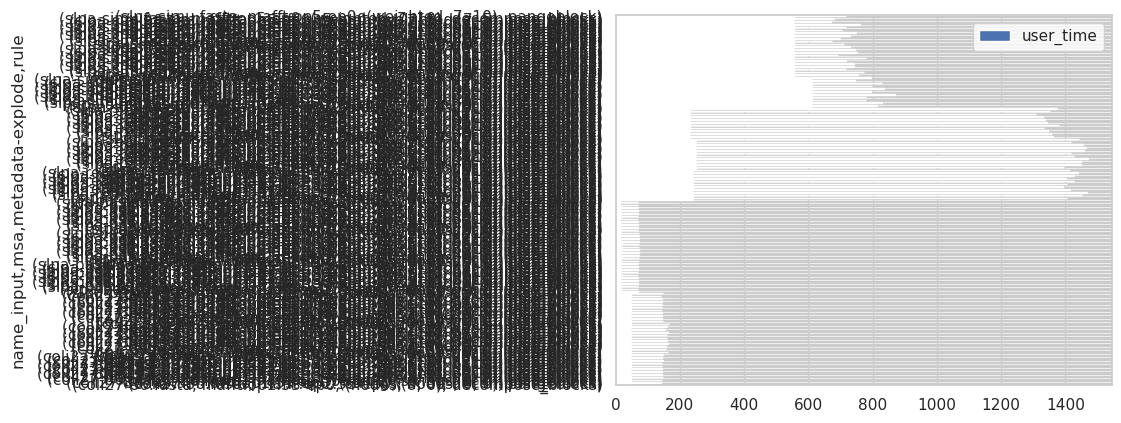

In [376]:
times_by_gfa.plot(y=["user_time"],kind="barh")

In [385]:
times_by_rule = times_by_gfa["user_time"].unstack()
times_by_rule["total"] = times_by_rule.apply(lambda row: sum(row[rule] for rule in rules), axis=1) 
times_by_rule["id"] = ["|".join([idx[0],idx[1],"-".join(str(i) for i in idx[2])]) for idx in times_by_rule.index]

<Axes: ylabel='name_input,msa,metadata-explode'>

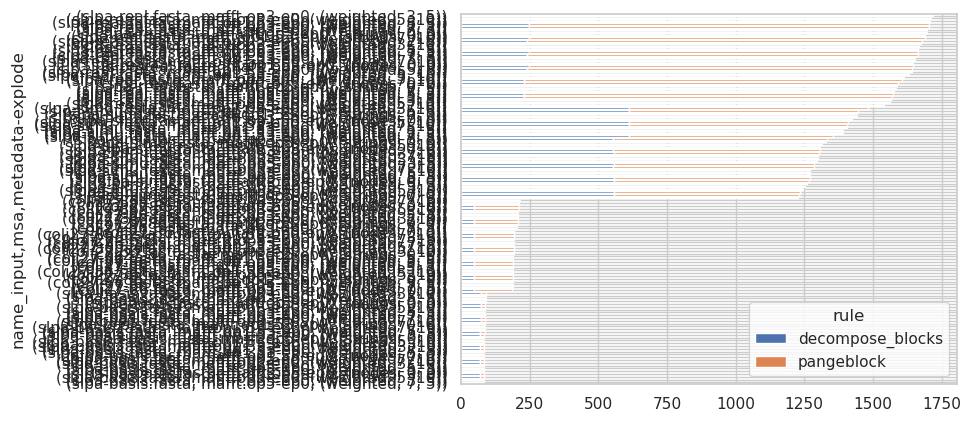

In [386]:
times_by_rule.sort_values(by="total")[[x for x in rules]].plot(kind="barh", stacked=True)

## Makeprg
___

In [387]:
# REF_EXPERIMENT="didelot"
TOOL="makeprg"

PATH_LOGS=Path(f"/data/pangeblocks-experiments/{REF_EXPERIMENT}-{TOOL}")
logs = list(PATH_LOGS.rglob("*.log"))
len(logs)

12

In [388]:
data_from_logs=[]
for log in logs:
    name_input=log.stem.split(".fasta.")[0]
    rule = log.stem.split("rule-")[-1]
    print(time_from_log(log))

    # msa 
    folder_msa = [t for t in str(log).split("/") if "output-" in t][0]
    msa = folder_msa.split(f"-{REF_EXPERIMENT}-")[1]

    data_log = {"name_input": name_input,
                "rule": rule,
                "msa": msa,
                }

    data_log.update(time_from_log(log))

    data_from_logs.append(data_log)

{'user_time': 7.38, 'sys_time': 1.26, 'wall_clock': 8.7, 'max_mem': 92788}
{'user_time': 4.31, 'sys_time': 1.26, 'wall_clock': 5.59, 'max_mem': 92844}
{'user_time': 5.82, 'sys_time': 1.31, 'wall_clock': 7.16, 'max_mem': 93712}
{'user_time': 12.59, 'sys_time': 1.35, 'wall_clock': 14.01, 'max_mem': 96316}
{'user_time': 5.77, 'sys_time': 1.12, 'wall_clock': 6.93, 'max_mem': 93528}
{'user_time': 7.63, 'sys_time': 1.28, 'wall_clock': 8.97, 'max_mem': 92804}
{'user_time': 4.45, 'sys_time': 1.23, 'wall_clock': 5.72, 'max_mem': 92792}
{'user_time': 12.91, 'sys_time': 1.33, 'wall_clock': 14.32, 'max_mem': 97732}
{'user_time': 5.77, 'sys_time': 1.29, 'wall_clock': 7.2, 'max_mem': 93552}
{'user_time': 7.33, 'sys_time': 1.23, 'wall_clock': 8.66, 'max_mem': 92852}
{'user_time': 11.99, 'sys_time': 1.3, 'wall_clock': 13.46, 'max_mem': 95636}
{'user_time': 4.17, 'sys_time': 1.27, 'wall_clock': 5.53, 'max_mem': 92848}


In [389]:
pd.DataFrame(data_from_logs)

,name_input,rule,msa,user_time,sys_time,wall_clock,max_mem
0,slpa-real,generate_prg,mafft.op3-ep0,7.38,1.26,8.70,92788
1,slpa-basis,generate_prg,mafft.op3-ep0,4.31,1.26,5.59,92844
2,coli27-86,generate_prg,mafft.op3-ep0,5.82,1.31,7.16,93712
3,slpa-simu,generate_prg,mafft.op3-ep0,12.59,1.35,14.01,96316
4,coli27-86,generate_prg,mafft.op1.53-ep0,5.77,1.12,6.93,93528
5,slpa-real,generate_prg,mafft.op1.53-ep0,7.63,1.28,8.97,92804
6,slpa-basis,generate_prg,mafft.op1.53-ep0,4.45,1.23,5.72,92792
7,slpa-simu,generate_prg,mafft.op1.53-ep0,12.91,1.33,14.32,97732
8,coli27-86,generate_prg,mafft.op5-ep0,5.77,1.29,7.20,93552
9,slpa-real,generate_prg,mafft.op5-ep0,7.33,1.23,8.66,92852


## PanPA
___

In [390]:
# REF_EXPERIMENT="didelot"
TOOL="PanPA"

PATH_LOGS=Path(f"/data/pangeblocks-experiments/{REF_EXPERIMENT}-{TOOL}")
logs = list(PATH_LOGS.rglob("*.err.log"))
len(logs)

12

In [391]:
data_from_logs=[]
for log in logs:
    name_input=log.stem.split(".fasta.")[0]
    rule = log.stem.split("-rule-")[-1]
    print(time_from_log(log))

    # msa 
    folder_msa = [t for t in str(log).split("/") if "output-" in t][0]
    msa = folder_msa.split(f"-{REF_EXPERIMENT}-")[1]

    data_log = {"name_input": name_input,
                "rule": rule,
                "msa": msa,
                }

    data_log.update(time_from_log(log))

    data_from_logs.append(data_log)

{'user_time': 0.58, 'sys_time': 0.11, 'wall_clock': 0.7, 'max_mem': 32764}
{'user_time': 0.58, 'sys_time': 0.1, 'wall_clock': 0.68, 'max_mem': 32700}
{'user_time': 0.58, 'sys_time': 0.09, 'wall_clock': 0.68, 'max_mem': 32752}
{'user_time': 0.58, 'sys_time': 0.11, 'wall_clock': 0.7, 'max_mem': 32676}
{'user_time': 0.59, 'sys_time': 0.1, 'wall_clock': 0.69, 'max_mem': 32468}
{'user_time': 0.57, 'sys_time': 0.11, 'wall_clock': 0.69, 'max_mem': 32432}
{'user_time': 0.59, 'sys_time': 0.09, 'wall_clock': 0.69, 'max_mem': 32388}
{'user_time': 0.59, 'sys_time': 0.09, 'wall_clock': 0.69, 'max_mem': 32428}
{'user_time': 0.6, 'sys_time': 0.08, 'wall_clock': 0.69, 'max_mem': 32552}
{'user_time': 0.6, 'sys_time': 0.1, 'wall_clock': 0.7, 'max_mem': 32428}
{'user_time': 0.61, 'sys_time': 0.09, 'wall_clock': 0.72, 'max_mem': 32440}
{'user_time': 0.61, 'sys_time': 0.08, 'wall_clock': 0.7, 'max_mem': 32344}


In [392]:
pd.DataFrame(data_from_logs)

,name_input,rule,msa,user_time,sys_time,wall_clock,max_mem
0,slpa-real,slpa-real.fasta.err,mafft.op1.53-ep0,0.58,0.11,0.70,32764
1,slpa-simu,slpa-simu.fasta.err,mafft.op1.53-ep0,0.58,0.10,0.68,32700
2,slpa-basis,slpa-basis.fasta.err,mafft.op1.53-ep0,0.58,0.09,0.68,32752
3,coli27-86,coli27-86.fasta.err,mafft.op1.53-ep0,0.58,0.11,0.70,32676
4,coli27-86,coli27-86.fasta.err,mafft.op5-ep0,0.59,0.10,0.69,32468
5,slpa-basis,slpa-basis.fasta.err,mafft.op5-ep0,0.57,0.11,0.69,32432
6,slpa-real,slpa-real.fasta.err,mafft.op5-ep0,0.59,0.09,0.69,32388
7,slpa-simu,slpa-simu.fasta.err,mafft.op5-ep0,0.59,0.09,0.69,32428
8,coli27-86,coli27-86.fasta.err,mafft.op3-ep0,0.60,0.08,0.69,32552
9,slpa-basis,slpa-basis.fasta.err,mafft.op3-ep0,0.60,0.10,0.70,32428
